In [191]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.callbacks import ModelCheckpoint

In [192]:
DIRECTORY = 'New folder'
CATEGORIES = ['mask_weared_incorrect','with_mask','without_mask']

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(128, 128))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

In [193]:
classes = ['mask weared incorrect','with mask','without mask']

In [194]:
labels = np.array(labels)
print(labels.shape)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

data = np.array(data)/255.0

(148,)


In [195]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [196]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [197]:
trainY

array([0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [198]:
testY

array([0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0,
       2, 0, 2, 2, 0, 1, 1, 0], dtype=int64)

In [199]:
cnn = models.Sequential([
    layers.Conv2D(filters = 200 , kernel_size = (3,3) , activation = 'relu' , input_shape = (128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 100 , kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(3, activation = 'softmax'),
])

In [200]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [201]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=cnn.fit(trainX,trainY,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 15s 4s/step - loss: 1.1118 - accuracy: 0.3085 - val_loss: 1.0930 - val_accuracy: 0.4167
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
3/3 [==============================] - 10s 4s/step - loss: 1.0990 - accuracy: 0.3404 - val_loss: 1.0984 - val_accuracy: 0.2500
Epoch 3/20
3/3 [==============================] - 10s 4s/step - loss: 1.0941 - accuracy: 0.3617 - val_loss: 1.1043 - val_accuracy: 0.2500
Epoch 4/20
3/3 [==============================] - 10s 4s/step - loss: 1.0980 - accuracy: 0.3617 - val_loss: 1.1200 - val_accuracy: 0.2500
Epoch 5/20
3/3 [==============================] - 10s 4s/step - loss: 1.0879 - accuracy: 0.3617 - val_loss: 1.0959 - val_accuracy: 0.2500
Epoch 6/20
3/3 [==============================] - 10s 4s/step - loss: 1.0836 - accuracy: 0.3723 - val_loss: 1.0861 - val_accuracy: 0.3333
INFO:tensorflow:Assets written to: model-006.model\assets
Epoch 7/20
3/3 [==============================] - 10s 4s

In [202]:
cnn.evaluate(testX , testY)

1/1 [==============================] - 4s 4s/step - loss: 0.8444 - accuracy: 0.6667


[0.8443865180015564, 0.6666666865348816]

In [203]:
y_pred = cnn.predict(testX)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[0]

0

In [204]:
classes[y_pred_label[0]]

'mask weared incorrect'

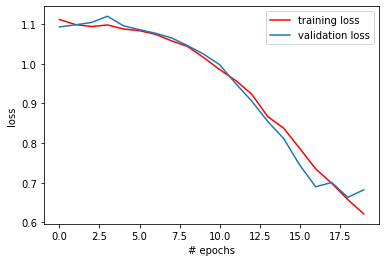

In [205]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

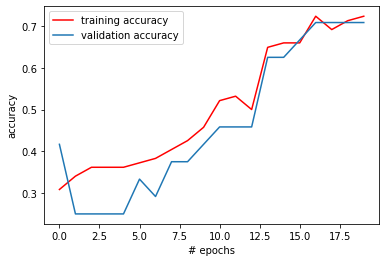

In [206]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()